In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

In [3]:
obama = pd.read_csv('BarackObamaTweets.csv')

In [4]:
obama.head()

,Unnamed: 0,date,id,link,retweet,text,author
0,0,20h20 hours ago,786982739517943808,/BarackObama/status/786982739517943808,False,Denying climate change is dangerous. Join @OFA...,BarackObama
1,1,18h18 hours ago,787010142378332160,/BarackObama/status/787010142378332160,False,The American Bar Association gave Judge Garlan...,BarackObama
2,2,16h16 hours ago,787039774330748928,/BarackObama/status/787039774330748928,False,We need a fully functional Supreme Court. Edit...,BarackObama
3,3,21h21 hours ago,786964419905523712,/BarackObama/status/786964419905523712,False,"Cynics, take note: When we #ActOnClimate, we b...",BarackObama
4,4,Oct 13,786680553617629184,/BarackObama/status/786680553617629185,False,"""That’s how we will overcome the challenges we...",BarackObama


In [5]:
obamaTweets = obama.text
obamaTweets.head()

0    Denying climate change is dangerous. Join @OFA...
1    The American Bar Association gave Judge Garlan...
2    We need a fully functional Supreme Court. Edit...
3    Cynics, take note: When we #ActOnClimate, we b...
4    "That’s how we will overcome the challenges we...
Name: text, dtype: object

In [13]:
STOPWORDS.add('Iowa')

In [14]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = STOPWORDS).generate (str(obamaTweets))

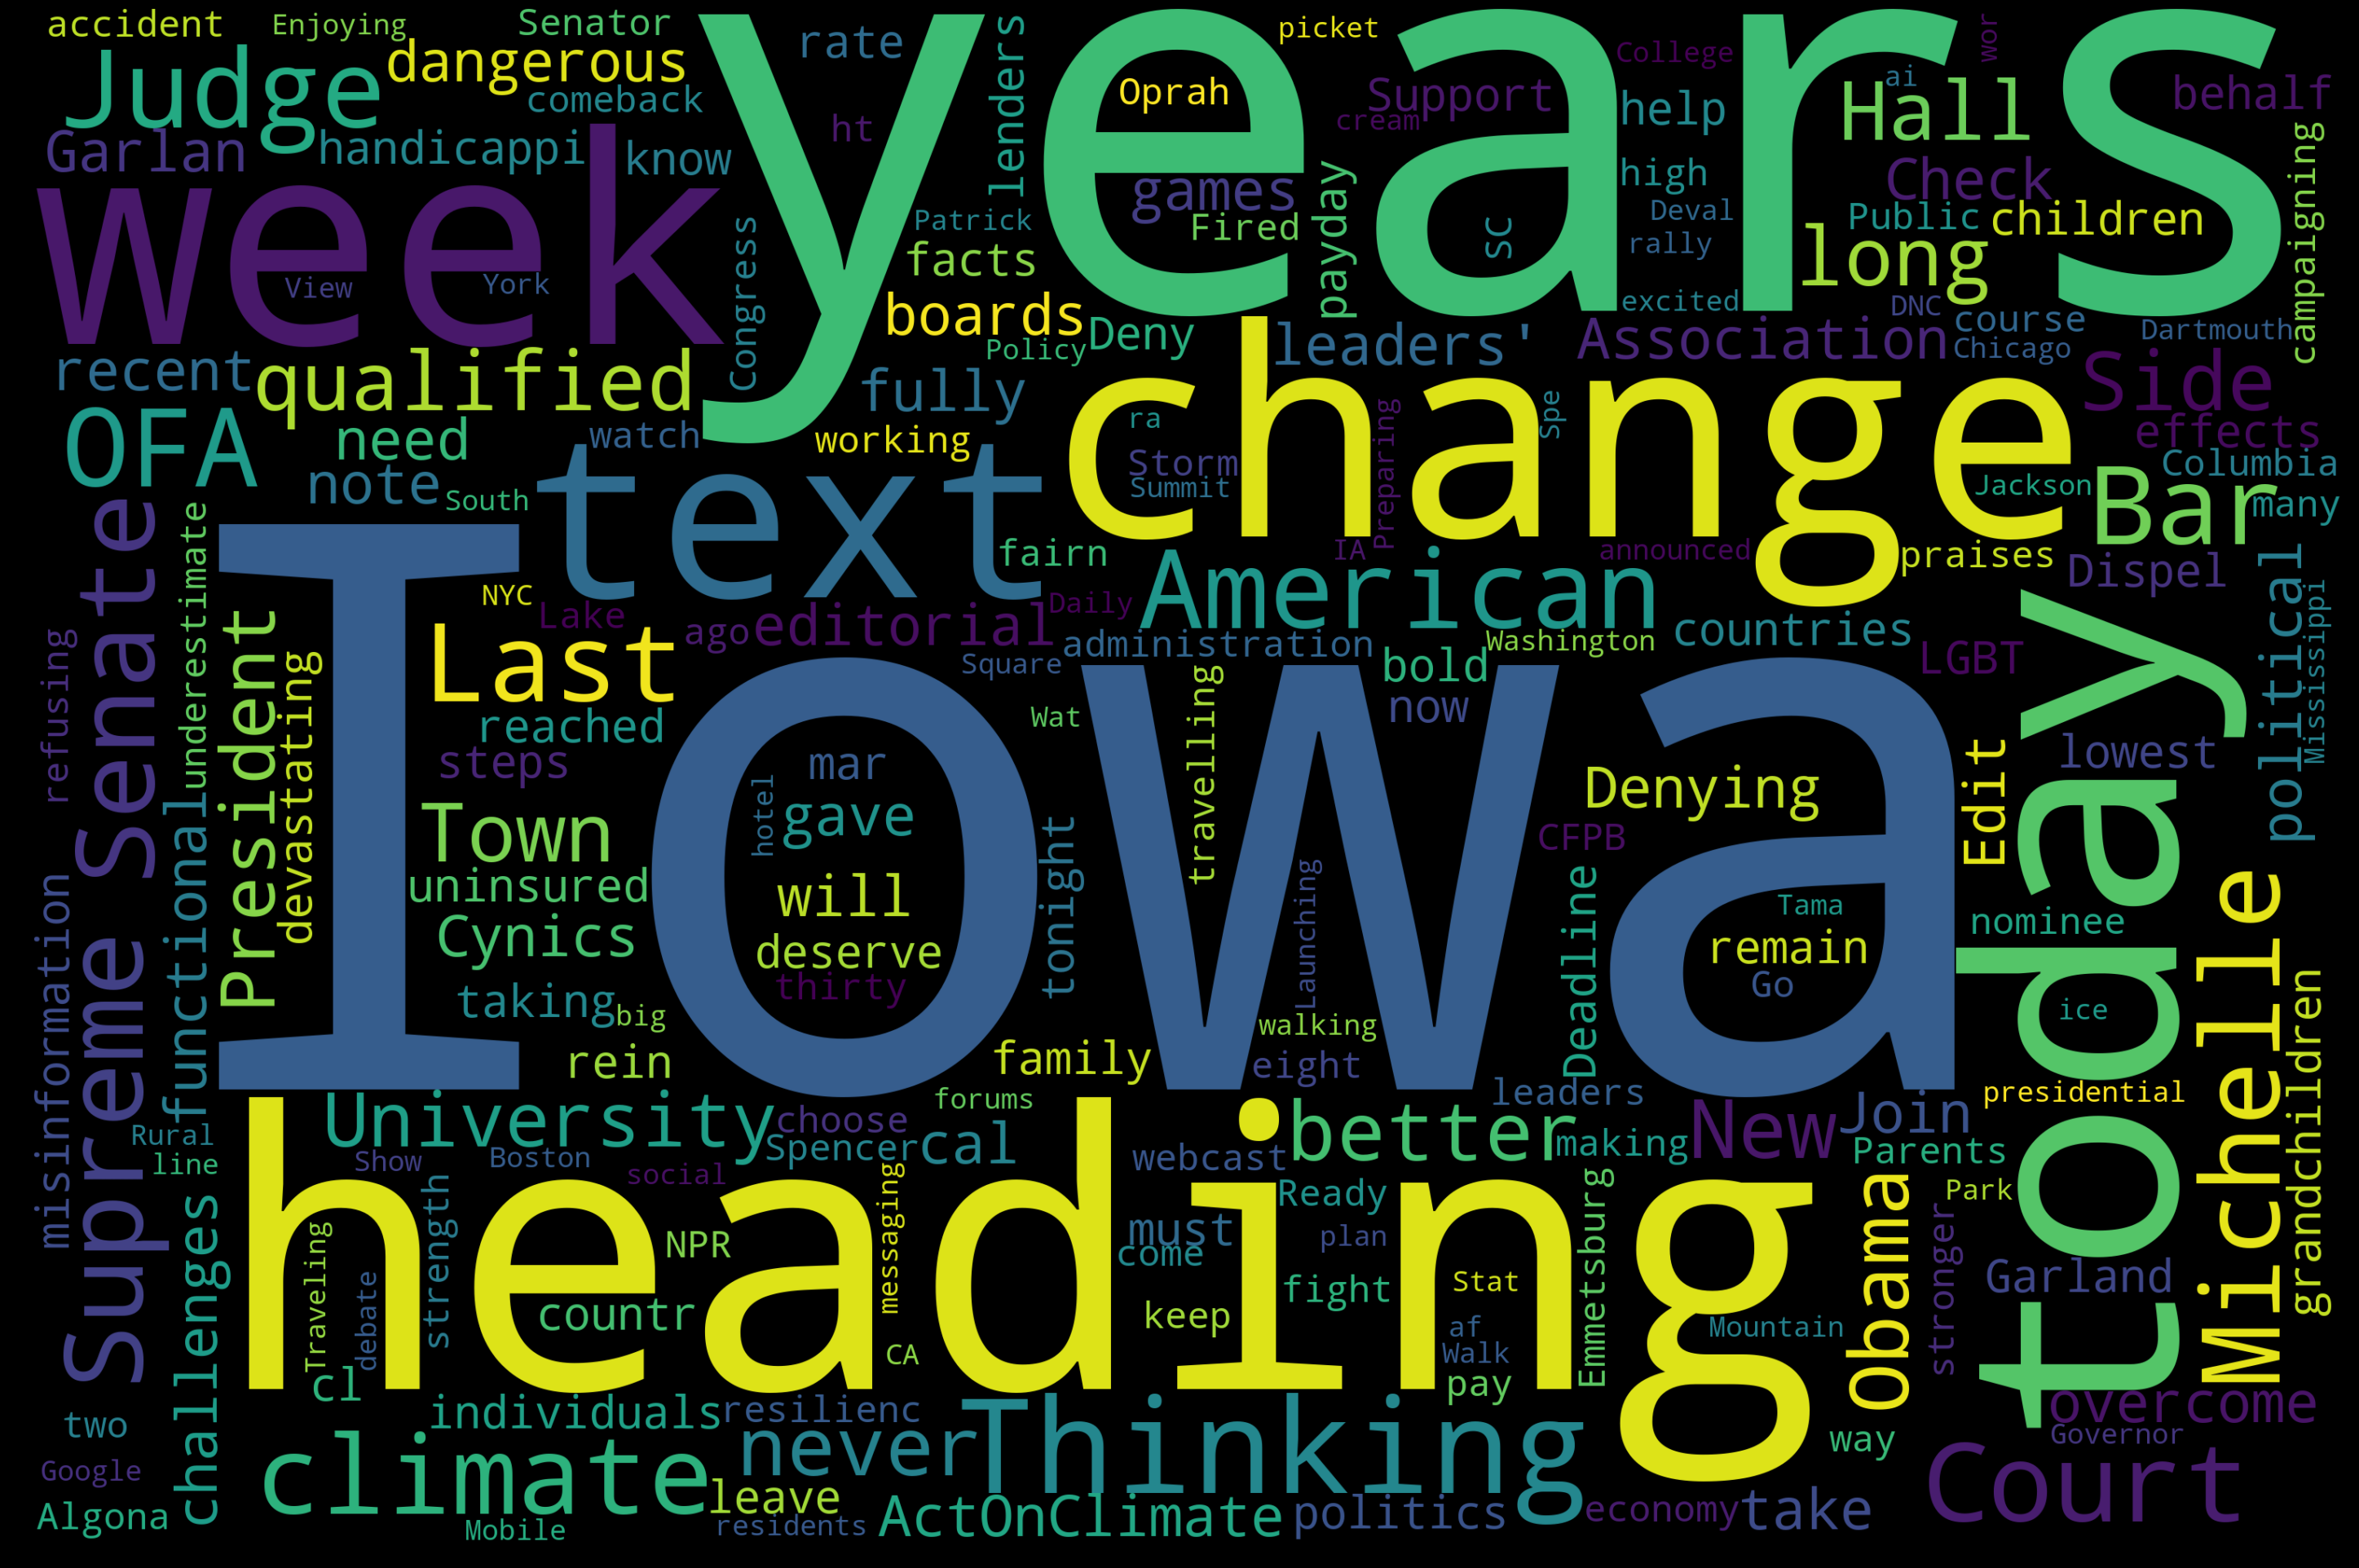

In [8]:
donald = pd.read_csv('DonaldTrumpTweets.csv')

In [10]:
donaldTweets = donald.text
donaldTweets.head()

0      Here is my statement.pic.twitter.com/WAZiGoQqMQ
1    Is this really America? Terrible!pic.twitter.c...
2    The media and establishment want me out of the...
3          Certainly has been an interesting 24 hours!
4    Debate polls look great - thank you!\n#MAGA #A...
Name: text, dtype: object

In [22]:
STOPWORDS.add('Donald')
STOPWORDS.add('Trump')


In [23]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      max_words = 50,
                      min_font_size = 10,
                      background_color = 'white',
                      stopwords = STOPWORDS).generate (str(donaldTweets))

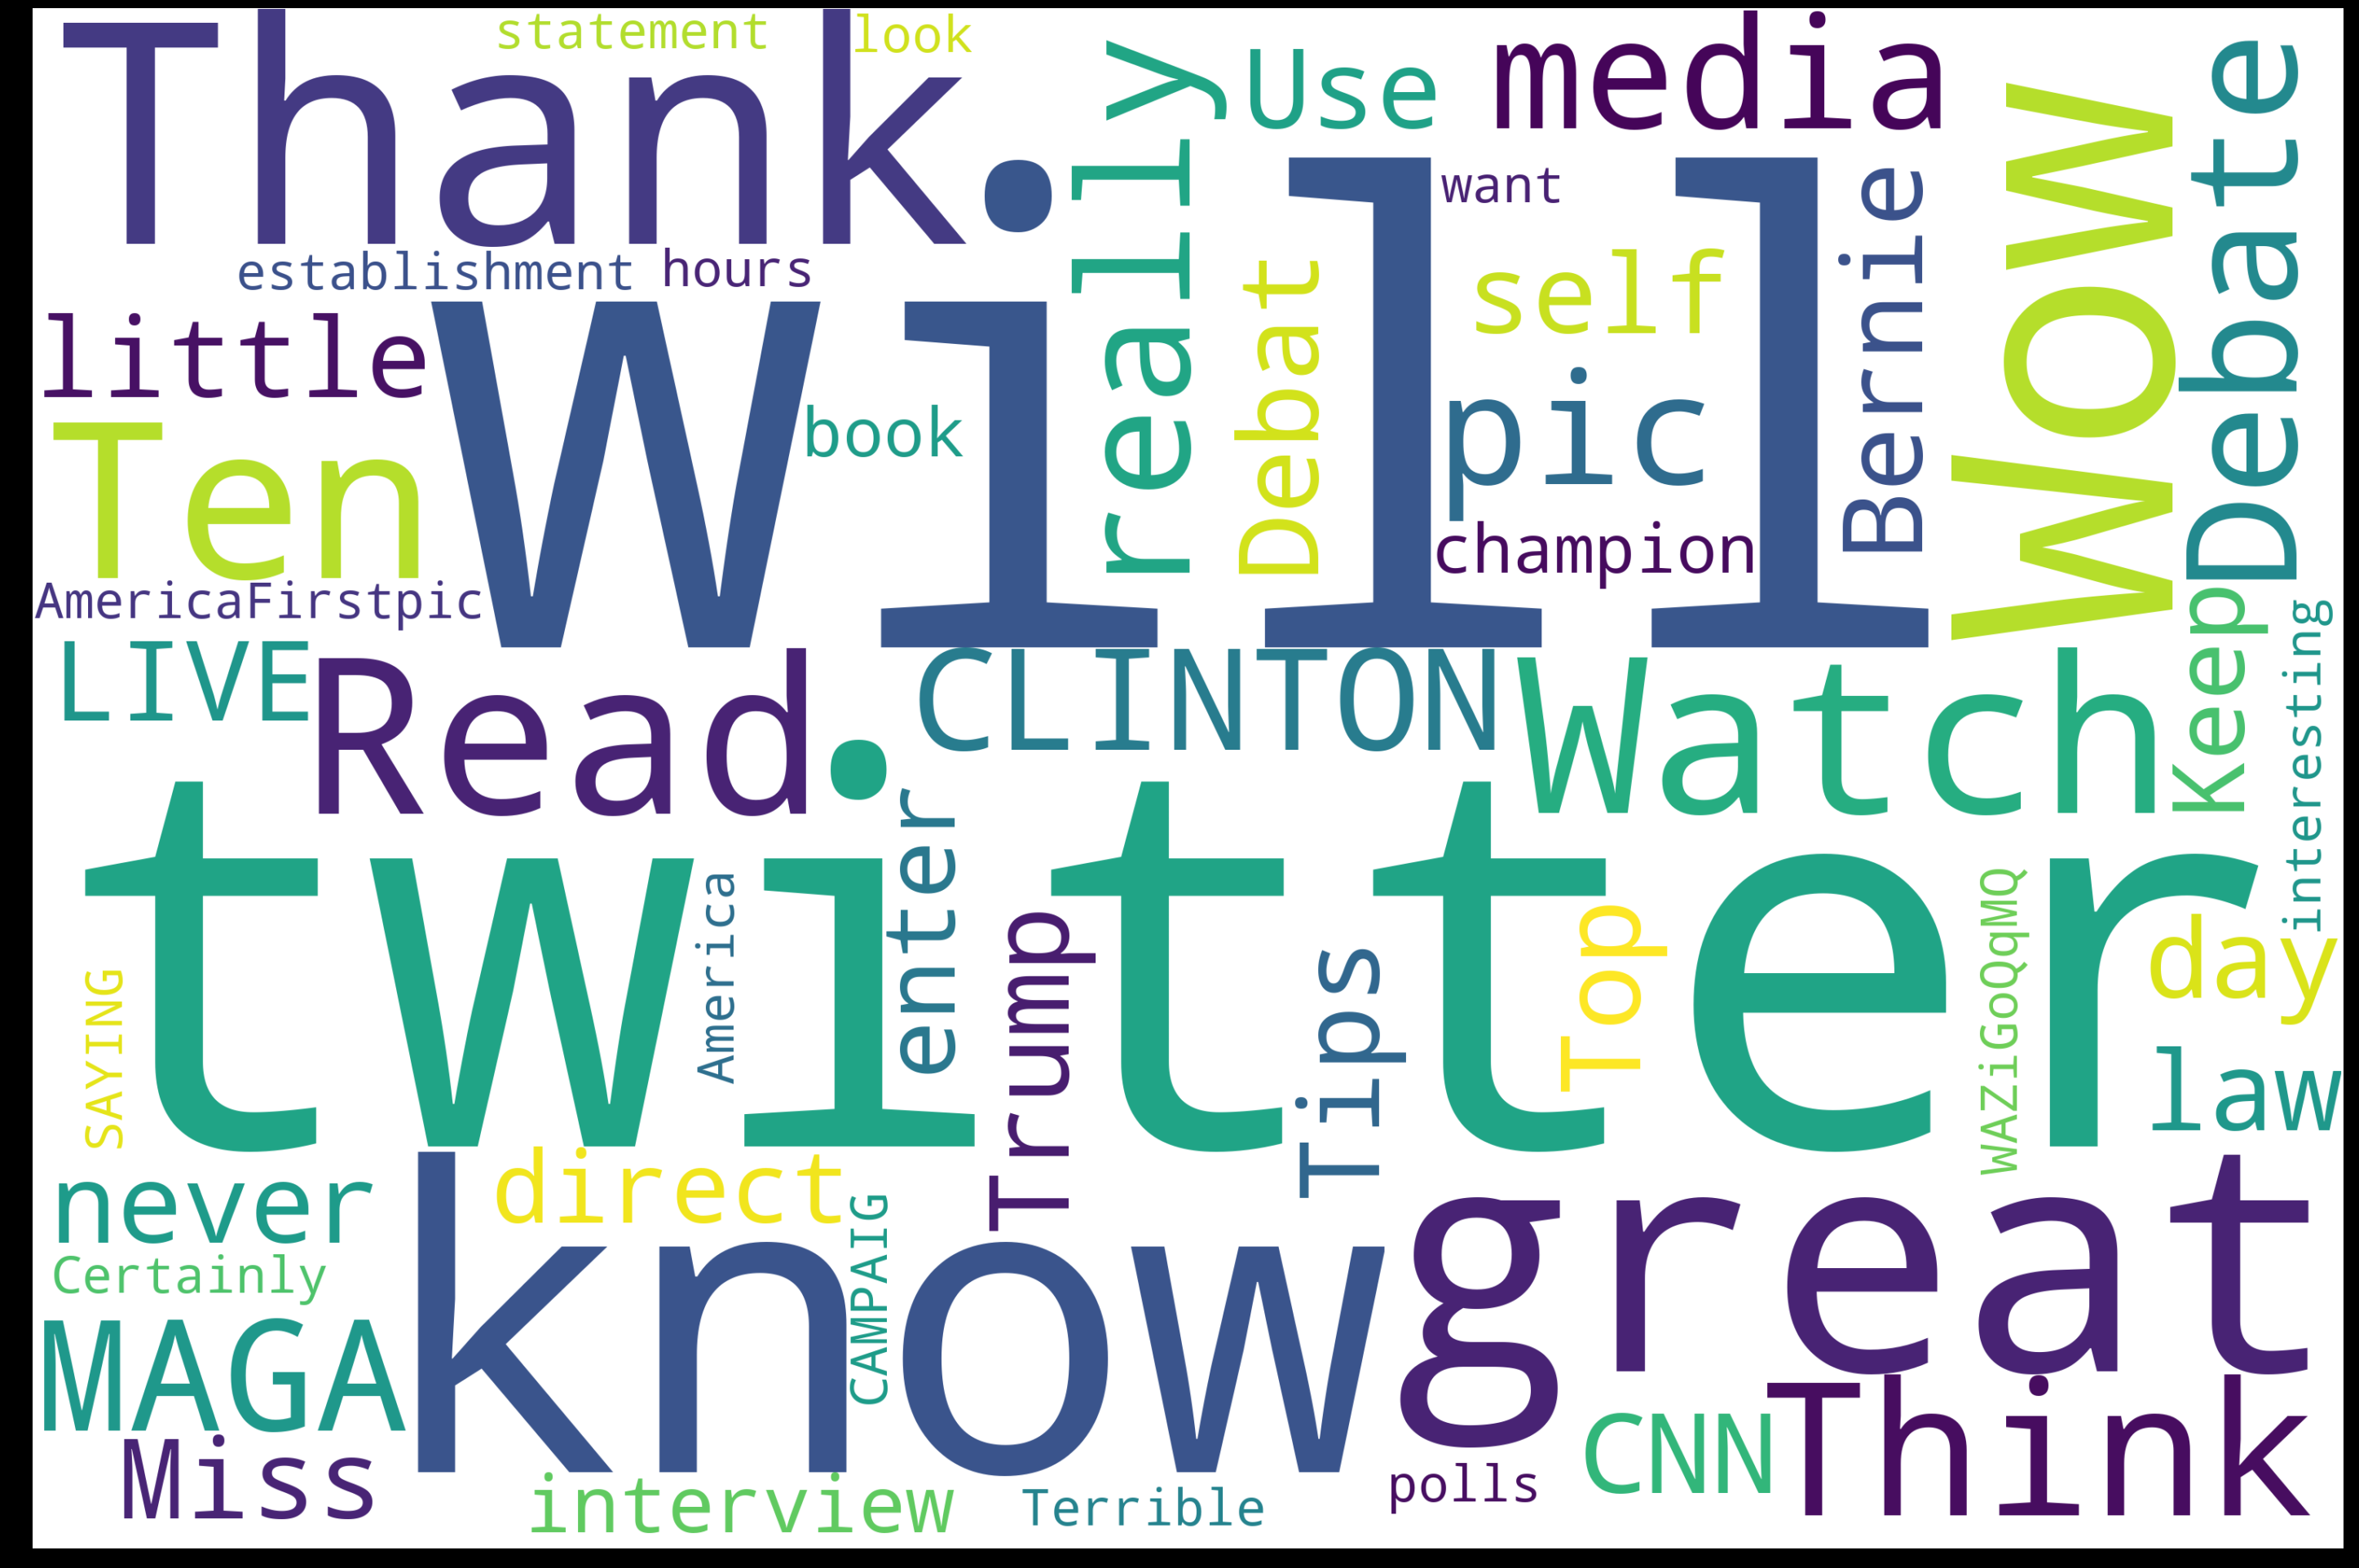

In [24]:
fig = plt.figure(figsize = (40,30),
                facecolor = 'k',
                edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis ('off')
plt.tight_layout(pad=0)
plt.show()

In [31]:
donald['Trump'] = 1
obama ['Trump'] = 0

In [35]:
data = pd.concat([donald[['text','Trump']],
                 obama[['text','Trump']]], axis = 0)
            

In [36]:
corpus = data.text

In [37]:
corpus.head()

0      Here is my statement.pic.twitter.com/WAZiGoQqMQ
1    Is this really America? Terrible!pic.twitter.c...
2    The media and establishment want me out of the...
3          Certainly has been an interesting 24 hours!
4    Debate polls look great - thank you!\n#MAGA #A...
Name: text, dtype: object

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
vect = CountVectorizer(stop_words = 'english')
x = vect.fit_transform(corpus)

print(vect.get_feature_names())

['00', '000', '000th', '0062343971', '008', '00am', '00d3ec5a', '00pm', '00pme', '00ykww_bq2i', '01', '01101o10', '01am', '02', '020215', '025', '03', '03pm', '03uzbgcswb', '04', '040', '040715_trumpferrypoint', '05', '050urjw3ay', '05ce', '06', '065ba39beb30', '067', '06wj5cdqjee', '07', '071', '07_aoamhqe', '08', '081', '08fmnhytac', '08xkebd8be', '09', '09kjvjsz', '09t2g1cn8s', '0auxm3mkpr', '0bama', '0bz1xe64', '0c004f23943c33b9', '0c8xcc150c', '0dhgkdghrn', '0dhwrgu7wf', '0dkapeiojr', '0dr0v3czmh', '0dyhkzzwvj', '0fbis3', '0fgzszchvh', '0g9fz', '0gmvnr3lfa', '0hehswov', '0hj8rfli', '0hlq1lsnkn', '0http', '0jcjfbcpjz', '0jftpkahxq', '0jks1vvv4y', '0jxbenuujg', '0kbf22nnm4', '0ksfxiokdg', '0lcn8awguw', '0mqrlgb9', '0nv7t9mhru', '0p4qsnaltb', '0p8jrkyucq', '0qfn2ag1', '0qi9jaxo6b', '0r81wgq4ba', '0rtsmxdnfc', '0rxuay3ap1', '0s04skhpsg', '0seydeb81r', '0t8yc2vyyk', '0unicornchris0', '0vmcfwgt0y', '0vzpwvzbqg', '0wcte1r2ti', '0xdhgjbk', '0xqt4gjm3g', '0yxynumyxj', '0zwthubfn7', '10', '

In [42]:
from sklearn.model_selection import train_test_split

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, data['Trump'], random_state = 0)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
log_reg = LogisticRegression()

In [56]:
log_reg.fit(Xtrain, ytrain)

C:\Users\ASUS\Anaconda3\envs\CCE_Course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
featureNames = vect.get_feature_names()

In [66]:
sortedCoefIndex = log_reg.coef_[0].argsort()

In [67]:
for index in sortedCoefIndex:
    print(featureNames[index])

bo
retweet
sotu
ofa
president
mp
instagr
rt
uswnt
romney
reform
potus
actonclimate
et
getcovered
act
obama2012
biden
nation
women
visit
reps
voices
health
education
haiti
ve
university
progress
twitter
insurance
michelleobama
enoughalready
choose
compromise
gulf
companies
ia
stronger
romnesia
whitehouse
decide
fact
citizens
vp
yes
com
actonclimatepic
matter
months
families
worked
hc09
teachers
watch
child
forward
senate
nearly
immigrationaction
dreamers
obligation
agreement
2009
congress
students
passing
congressional
americans
peace
house
secretary
pic
dinnerwithbarack
growing
supreme
voice
town
immigrationreform
opportunityforall
happened
daughters
live
supported
collegeopportunity
spill
middle
celebrating
journey
workers
change
gov
ff
ready
today
equal
year
tweet
behalf
finish
doyourjobpic
reduce
production
tell
added
violence
2008
economy
future
welcome
livestream
historic
influence
demandaction
goal
share
preventive
chosen
lady
6s3ah1
practices
college
info
immigrationstory
rebuil

tjcyr
ensure
chapelhill
buffettrule
pushing
world
oregon
couple
everglades
loopholes
dreams
ongoing
november
nh8xfc7iwu
happyanniversarypic
g3ahv2ye
meltdown
15pm
titled
implement
fooling
happens
protections
consolidate
gets
buckeyes
inmates
rely
calculator
wambach
abby
designate
secure
sway
taxcut
womensequalitydaypic
fans
ingenuity
steel
fellow
champions
rallies
treasures
spark
classroom
approaches
obamainaugural
deepest
shebelievespic
natural
al
kcemzdpq83
score
feels
tbtpic
summarizes
apostolic
ones
highlights
67pymg
qu4o8kywmj
time
dismantle
jtimberlakepic
ctmksbqtbu
creation
hardworking
firefighters
favorite
securing
disarmhatepic
mt
richard
registration
updates
9148gvsp
grahamblog
jimdemint
bringing
educators
arrivals
wi
dreaming
screenings
cosponsored
safety
amman
gurion
5euks9
sox
senators
vawa
supposed
actonjobspic
representative
rolling
journalists
ffvcgrp2
tsr7pojsjc
sotuhttps
402f
a129c700c000
af36
5efd
a7cfefaf
opponents
york
l6mobggudf
nominate
nationwide
renew
region
ho

drought
runways
modernize
bend
views
place
nasa
express
beholden
industries
unfair
grandchildren
past
couples
overjoyed
15kxp6
kickoff
passthebill
package
worthy
2000
geopolitical
affordablecareact
qfxq42k6
habitable
amjecs
sings
secured
derailment
enda
6226
874
877
develop
putsolaronitpic
standards
partisanship
neighborhood
underpaid
5s76ce
qfem0j9r3v
105
heartland
forums
hdnet
defaulting
x_jj2ru91su
urges
statue
kg5bpatp
unusual
mercy
expands
funder
gender
xm7efgjk
iyxappye
climatechange
flexibility
iwlx46ggmh
directly
party
privacy
soaring
josh
cheaper
1tlpqbh7qy
week
nfpoeni3xk
sandy
ransom
dtbvtj
commitments
plaintiffs
xz5dwiz3ef
territories
account
listened
fuller
devotion
burden
eve
guys
threat
223
kindness
rooting
actionsummit
pfeiffer44
dusting
barrett
temperatures
fixovertime
dihugxccsk
8oytd7xf
compete
prohibit
orientation
meeting
fallen
x2osoxhp
reclaim
briefing
ty2folwf
opgyjtf8
duw9t
reflection
statutory
pregnant
tolerance
paths
cleaner
japan
marchforinnov
imagination
con

ready4reformpic
dn0oq2vox1
stt3xzfvgb
nationalchilddaypic
cwz6uzbqgz
hr7hdynb
rationing
3ev3aj
ripples
j789nk
bunch
nrdc
cnpoww
6vzy3h
qupgbzkqq5
tiny
od7bhgjr
ancmeczuv1
display
fau60
household
189014576916987904
ko0xhbbv
pxnbinyfp9
avert
candy
poy
trickled
cutswecantafford
renewuipic
cqh2n8aup2
quit
vbmeyw3cse
beaches
stresses
navyyardshooting
2ckzn8w
hottest
ml8gymen
m0kcsd5o
going
ldbwictg
spider
716
48th
adds
parisagreementhttp
1124772
jimoberstar
possessing
prophecy
grieve
d0ayah
p1ru4hxxkx
iejpv45nk5
recommendations
efrtitf8w1
b1ubu3wcnf
nwm1xfhkzg
contributions
rallying
renewing
rebate
professionals
unmatched
17eonf
udp2ti5ji1
confirm
snpy
wcrx6c
745062
focuses
stretch
louder
dinnerwithbarackandjoe
uaczus7uv6
timetoact
treat
92elkk
cicyfgux
haaretz
v8smbd
evspsifnpb
disarmhate
trjrhh
bark
2352062
dallasmemorial
set
0kbf22nnm4
izgcuowe4o
responsibly
a0bgrb
betray
l4tkf1geui
proposals
9qff6ndrmr
a53x
culminate
ffas8r
actuallynph
fckctgyodb
y5ec3z
passover
hey
verge
petty
h5ewm5gq

rafeuf2o
1tw5r4
pk9wme
wkp
lapel
etwpne
niltyi
clooney
pxncn6
qavsd2
nsvgev
xigidd2ask
sthvw3
quzlxz
genuine
tunes
hhhbdehfzq
c5pc
a0rx
upnwst
6m6mrm
cawncv
x4kjyq
checkers
pks1o5
ts9
m9h
a8zgpt
ilwqmy
edith
yvx4xf
childs
f74x
dcktjz
opejpk
nen4pa
realromney
honored
bmhcsf
r4jx
hznqeb
d21t
bwjhd7
holy
obmsqklq1b
moly
rufusgifford
uptzju
ihqrfqqgkq
4mim86
6jhi3
nu
g55z
j4da
025
2lmqzv
2jgjls
interactive
egm
ys94dr
a2s
fmoj3h
gvdbaw
ubracw
bu2y3i
p0jh
ja0f
rchizv
suited
nbtu2x
b32gtg
c5pv
uxchge
sfsi5n
qwbgxf
q25c
intensifying
a0aq
oolrgwtk
nneh6xf6ls
percentile
humblebrag
98th
pm45ok
vx8hil
skeptic
settling
4azoer
ce
p1sm
sandra
mbsnir
gbqwxa
hlvara
hop3rg
39nz3v
obliihrpuj
x8x
3zsp2o
9cns6wi2o1
retain
xftnwa
pozo3s
bcskjq
g9
shrunk
j8vq
determines
mbige6
fj3qr8
mxx4f7
buxh3h
withdraw
pregnancies
pin
ep6
oppose
273ji9
pru9yw
illness
fzyxmmvx3j
b3u
emdorci84l
ogchfj3jst
t0p4
6jraag
vfqhfv4w00
ranger
d53l
jcqefxit
drawings
luz
qcei9r
leahy
2cb8dbx
exception
rrapei
xx5zwu
jamming
ix7
s9qv


uat
f1vj
n2ndfi
2vogws
fare
34aurs
amsm4f9r1w
h9mj
h08d
spbnkx
ai9p7n
vqreba
e2xj
ia4n
djdhzqmmwn
an3hpb
awbpvb
evlllg
ywpvxn
wza
d4rx7m
ga3q
employs
c5zgqk
hzr
rdmyi4nprx
i9zz
0xqt4gjm3g
kybezh
js9xr4
epykbs
reining
a0sg
j4j
ppgx6q4g0n
r1my
7kbz5j
paralympic
hwb8g2
aqbguo
w0wfzwjyh3
dvdbkc
rickklein
dmr1nuhnbr
e5j4
kalpenn
r00
qcegketf6l
guvrm2
fsbf9j
originally
ourocean
2cauhry
r4wq
p04m
q920
tvs1ny
x5kbhp
hqigxy
clementa
h8h7
pinckney
amercia
fitsnews
ly94qr
rpplmg
wzxejk
chrs4b
tsn_mprabhu
storylink
4736990
cpy
myrtlebeachonline
myrbeachonline
finishes
mauugs
bmni7x
intents
expel
xqmh3h
kptjew
b5rw
fpje5lqg3r
vowed
e210
dslehc
8qguf5
havens
h9da1t
azj
baayyi
xvxw6l
vs82ea
sxwckb
ek6p1v
limiting
t2ew
precision
2cjizdw
2vzfwz
dgb6axfn
mgxgp8gcwt
i7m
generating
r9vs
larry_kudlow
kudlow
ixzz3sefzfcwy
bkcolin
t6d6lt
hispanically
johnnydevine137
ahs7gh
d0og
pr6s9y
l9mfethwon
f2c
u0fgrpqm
gnqa4p
28452767
yb2hqe
blunt
aug
fxybnv
ffhbje
micromanage
cntugpmqaj
d12b
ixzz3nn4njget
horsetalknz


gennifer
nucleariran
ntl
ntknetwork
insidesouthfl
kaczynski
insiders
kailash
kajcqk
kakjoy
rachaelmarieabl
gerfingerpoken
inserts
nrshfdmuuc
nr2x8uqdm8
productivity
procrastinate
robbmack17
nr6u8is36h
nrcc
inolbfffrf
qrno0kdi
nrgy29
rickyricardo722
nrkln4qxfu
getalife
streamlining
spidersteve1977
nrdjzc
rabbit
scillierijr
qqo8ln
nj4q9i
profligate
nizmblmixuy
girlfriends
kemp
profootballhof
nishantagg23
ingredients
giunta
giveaway
progressindex
teasing
nikwallenda
rican
qq2nqhfd
qpqhan
gja360
nicksibrodi
qnkclguqcw
qoa6rmubpo
nicksteinmetz
scotgov
qpi
kelsey_2155
nieporte
progressing
kendrickbmeek
gjb43e
scotch
scorsese
nightly
gjtqtv
nomorenamespic
kellyjeanturner
nkltvk
giantsandles
nomineehttp
qq6zlvwweg
injustice
nominates
injuries
nom
kdvzouia4i
gift2012
nodakgus
scm
gigicats6
gila
nobamacare
gillibean8514
gilmore747
noamscheiber
nlugrl8b
nmm6dw
spear
keithurban
girardi
giq
initially
injections
nncnpzxr
scmaness
nnompg
no_average_joee
noahgraycnn
noahhoch
ginajargirl
satellites
k8l

scottvanstory
newyorkny
glide
globalism
newurhbu
newswriter2
teaparty321
newswidget
glock34girl
newsobserver
teamspringsteen
scrap
newsmax__media
qkxx1lqh
newsintheburg
kevinyoder
ragingcynicism
kgxa1mhvae
neverforget
qknineus8h
new_york
gmvk20
raids
glhs9w
gmar916
kg
newark
newhopenchange
rhm2ekdwsf
infiltrate
newscasters
new_york_city
neuroticknight
glfceo
kevin_johnson68
tease
gkohlschmidt
nick95b
nick2travel
striketrump
nicholas_wyman
sparks
nicholas
nicest
scottbaio
glaciers
progressives
nia_sanchez_
nhqscs
nhprimary
scottishrecipes
prohibitively
nfiydptppn
refocused
nflonfox
hryp8ibcmf
qmfvpuymfu
kerrygold1914
glenn
rhodes
qmur2v
glajc
gladly
ngv83z
nhbnat
gladder
ngmhyk
khalidnasser
khbakf
khh85s
goodell
gooders
goodfriday
roadrunnerkd
stts
sttynz
goofball
tdavistonya
kilt
indignant
td7afx178l
seaboard
indies
ncbillsfan
indie
goppic
kimberlysyring
kingkript
gotcovered
seandburke
qht
kimkardarshian3
nbcdfw
indomitable
seanbarakett
kimbredesen
gored
indianola
gordon
goqtwzhjam
nca

descended
znv69q
u2yt8y
137
derrick503
columnist
1920s
derived
6lvhcwe9qw
zedd_tahlz
derekj3031
u404zzun6v
ycslc3
uyq4styb0l
deranged
6mojwe
uxpg4wwr4c
9lteysfkpo
bchipper83
u8xsa6
alarming
6usqsiaaj7
blooded
bdbender1
commissions
6v9ut2j7gk
bdbs8byghwr
bczpuzptcc
committees
demegl10
demeanor
uauon5fm
uukacqyq3f
9samalzc
compact
13dj4br
wbuwt9
bcs
6umglyjwht
uva
xx5ear
zeldinforcongress
9up9vj
u9q
215598
denigrate
uwg6c1cz0q
6riefh1kpd
wbn6ih
uac
uvrfaw
6rqsphybnx
uaerumhxv
6sgoaw
3d
6subal
ychvftnzib
1tlqdww
6ltvvp
bleeding
13xjiuq
xc9v2f
believers
whacking
wearingorange
dazf29
356
conning
dbnic3miol
20150808
762739520567738368
bkoqu1mm4a
yankeeworshiper
ajxd8c
consent
bellanycmag
davidkaifaith
yankzpat
belllabooo13
20151006
congresshotelstrike
ddeessm
conghuelskamp
ddb_ifghxl
9c1otz
umc
74izhf
9b04
20151016
dday
behring
3518397
2jzgqmci0e
9b
akbar
congressgent
yardwork
dcooldog
772khej6
belt
davidgordonjr
davenorthyv
yahootv
consists
conspiracy
9731
78e8
daveinkeno
davenport
conspire

zskxewo15k
1phsedp
triumphantly
dzwrw9
yhnzhem9
e70ate6lnr
vinnie_vegas_76
1c3qoic
10156952559355725
259
audition
1qmiqop
1emh5b
transcends
e6vjy6
catisbetter666
allyn
amaninmanhattan
eldycorrea
xuhi7j
advertisement
25u9ka
walterekurtzjr
e40a
assesses
1duqntxlt
trough
caucushttp
caucusgoers
trounced
yhxmg6aayh
1cvqr9i
assertive
walsh
553183671801634816
w945nrrpzq
yhaehx
breed
e880
egpash
ehalhj
593644
yhywihddmq
ceovince
eie6u
vintage
ejpasseos
e5iu
ejw2b6
2ntzmmkgbe
e5gc
a7hz2k
atom_murray
e5g8
elcaminojesus
encountered
xufugc4fg5
1cbxmna
eian_bell
e5fl
encore
ehi81do0vb
charleydummer
e5jr
10156977481470725
traitors
employer
cent
xiuvj6
5b3c2pbexa
10156687171790725
55023
waive
empthrqf
bowing
e5iz
1obuzmr
enclosed
breeze
egop
555536708952133632
causa
troop
10156883852800725
1qjjvjn
emblematic
1dzbxkj
10156610923070725
translates
embed
1qlxcnmnewyorkvalues
vivhall3
dyyozz
emcgtk25fe
eaqhz5ttmp
1oe798aaeu
cavemen
caveat
3xpjvbzuk5
charisma
atty
trapasso2501
aanders07
boycottmacyspic
101

prepping
miketilley13
2vote
livnow
ihatematt
heathermama3
sluggok
trac
kv9pttdxm7
1xl94vh
mattastro
bettyblopper1
plot
packerlegends
600972130470203392
russell_triston
44turns54pic
realmissctusa
friend_bus
wgonet
jj10471
spewing
sununu
luke_mcgrath
wolfblitzer
monetarily
jaymztyler
tsheppe
sharpest
griffintimothy
alarae37
linda_lcarson
rimrhb
calisunandsurf
walding
10156584028145725
bashers
john832thetruth
inconceivable
597490
_xx_justme
daxdav21
trashes
xan002
mvermi
scteaparty15
teapartypatriots
kyle_diehl34
heymaccc
snap
3809204
michaelscarbrou
giv
tltiger26
redux
naomiepstein
chrisbiedermann
sayylalalaselah
confessionnight
presidente
holder
irwin171
oakland
zo0r9a
mlive
tubgse
detailed
dancurran4
kormylo
chuckesquivel
josephangel247
goodadvice
amustreadbook
ddrocks777
mater
alma
willeshirey
2574339
russias
berniesanders
pamelajanevp
2mooa3gfh9w
bingeviewer
tjoanides
jkapper15
domination
feinstein
11jop04
marcopolomacon
pjwj316
realjohnanthon
jaybaby63
renta
valbano206
manofsteel619

morangary61
nope
nawal
uf9606084212012
13hplus
reillycarole
15yiaem
ellenmarie47
_marcogenovese
usuallybogey
michelle823
lucasflavin
stanleycup
kane
88pkane
therickyjones
xpaev0yzgv
fox2
chris_nima
alexmoose454_
neilturner_
1fj6wytlgbo
dillsmama13
aakash4cesc
otto2468
yguu9bgayo
wwtcorp
damacofficial
louis_the_iv
idk
beans
daveperry71
madinahtamer
alejandro12386
kellykoson
apollonc1
mnmanstein2
racrboi90
operapilot
spirits
clouds
sad__mom
angiecallahan4
jokes
coollukehh
lirpa_mc
uruguay
justinrose
pennypritzker
marketed
weaverinc31
moose_taz
agegrilli35
xl4s1t
kmovnewsfeed
user9888
fartlesburg
stylebrandco
dragged
leebandoni
b0923ef3dd5d46c
suspicion
995mu
therealhamzeh
countontrump
channelguide
diannelea1958
10156604838290725
paltrow
speakingtruth11
xwellludwig
teens4trump
goons
whip
mdavis22569
jrnicholas8
bigd921
screams
dominant
a08sqfzblr
australian
pnerrad
vu5bzf
robertpizorno
pelosi
1941
robertr369
courtesy
14rbwfv
dramatic
towers
similar
yournotfired
niyafiya
ebkids
everthing
e

baier
h55j1d
ailor424
mvnivf
invading
pc
billybush
luvsleopard2
izzyirelandxxx
10156599412210725
9hb7jo3wrz
jerr209
bobbybnews
pierscomments
g0d_
2pyzdoirg
_katemorgan_
bpeazy42
fvb123
cunninghamny
bernardcastro3
jp_sitles
ohme
4udirtyrat
caejh
dumbasses
dominicformaro
hilarious
mssamanatha
seancourt
kraftywurker
theminifed
fcveg3
solyndras
z37f0a
ac
cps
bldgs
kvb423
chriscjackson
equated
cluxury
g153339
satisfy
knuckldraginsam
shulman
affair
baglanhills
noirandeal
americanhowl
debtampa
annoying
anyday
jeff713jeffrey
jacquel80505769
spiral
marshall_cook
leary
michaelkakos
psychiatrists
lovusa4
sonnset2
bradangsa
greaseweezer
citadel
senatortimscott
citadelgop
dnorrell
thecelidebiasio
fqomo8
gtqm32
warplanes
atroxell
ghetto_trophy
s1
10yo
seankanderson
grcp13
cave
wimp
basketcase
superpacs
libbygaj
ydi0qnmhzp
figdha
zc4asb
ichicagoscott
x0tdx
gshuba
great_cudi
r4zji1
1406042263
organic
davidbodner
xcpyxf
washtimeshttp
zacking30
dillonjquinn
wmikewood
brandonzappi
thisthursday
terrellowe

mediabuzz
nmvrlw
mainstream
burt
reynolds
charleshurt
retains
6uaecpwqwm
1qyqpqy
rahmemanuel
imdruchainz
replicatemedia
firmly
captivating
chrisjpmac
desperation
gd1gc2
snlstar
dull
equestrian
marianoriverafoundation
erictrumpfdn
qsltrsg3wq
1k8jfqa
swvihf
highhttp
96
suburbs
jav9mk
landscapes
entrance
sensibility
jlpdog
lindasuhler
halls
aphonapelma
ctsa
immune
upwards
ww3
danielprofit
jskrepak
tlcr2
cnnbrk
jennyapples
benefactor
periodpride
xvezsr
gqo0qo
181p7c0
lodha
brain__quotes
kamerakeith
ridden
5ku8aomhf
iamgrizzly1974
gifford
trumpfan
nycdeb8tr
coat
142646274
427574092f
vimeo
user12308995
gf8vr0
yzr9np
jwundy
sheridanbetts
rd0zychgmf
steveaustinbsr
hbtc23
9rj0sn
ew
hanan_khan2
josiahjames17
slap
strange_drugs
unfunny
jerryseinfeld
kanikagahlaut
democratsfortrump
beautifully
poetry
scorpiannes
ashleymchandler
mhrynuik
joel
exporter
diamondslpn
tone
inflammatory
bubbachitchat1
prestigious
gjcf
missuniverse2015
themyamccurry
chris_mcnall
linsinn
thepgaofamerica
mastermind
christ_s

xaxhk9
brilliance
alexeveslage
wfszrf
defect
bushhttp
republicans_568fba2be4b0c8beacf694f4
somelikeitlar
morals
m800v5c6l7
mleitzmann
rustyrockets
supersaturday
kimberlyaroach
suandres2013
tack
1kegjl1
yzduip
conclave
nicholasballasy
littmannraymond
81
ronpaul
assembly
exceptions
supersede
studies
previously
17oyxh1
10156387656245725
ko0rypnsx8
reacting
uwere
evry1
mike_carrion99
urself
8wez1ose16
joshhasadog
hmtvm5mpxmb
reverend
jeremyrlack
katrinapierson
9wwrwnvqiv
10156623696310725
votetrumpnh
unfinished
represented
djohnsonpga
dustin
dannyzuck
hellocory
g6fa5v
cartel
located
cons
imaginary
luthervii
binds
dumped
hyatt
headache
mwz524
q7db1afke3
terrace
scenario
jahbalon
folded
4kqx4pmt0i
refuge
miners
steelworkers
wendypeters
alphainparis
mwtibh
labeouf
sober
thecampaignbook
shia
c_shepler
9fu7vendri
trooper
tonights
seasoned
obio
capitalism
marc
preachpalerider
descent
colincowherd
theherd
hodkfpj6lt7
davidwohl
demsinphilly
1994
qr8ara
impossibilities
visionary
alphaquintesson
krc

renovation
successfully
zac
vieira
arthurkade
hough
meredith
khbnw7gyhf
posen
chatting
tpsocw
kim
llp
derektheeight
rooftop
clowns
sominex
7gxcgxghbg
clarksmidt
unanimous
geoffearle
phbu46
militants
adios
hellhole
evangelical
destruct
nc777ww
uret2a
1rrs2zb
helpless
matches
marcos
maidana
fading
convinces
selfishly
wlttbb
6nbvyemhdb
twisted
classify
hugh
baghdad
suleiman
nasrallah
bake
gotcha
hewitt
giaw6
undervalued
sdu4il
elegant
relevant
foley
peggynoonannyc
16ezitr
advisory
10156714551570725
n83cbs4jta
enhanced
colemang81
6odle7j1hd
mittromneyhttp
buren
1836
letsmakeamericagreatagain
mexicans
meghan
jodil792
equipped
bedlam
martinjajou
surrounded
prescience
16eotwo
spanish
gravitas
overflowing
d_mellette
2k16
vpbiden
collector
westchester
15c56cn
jaysekulow
42k
branding
repchriscollins
fadil
fave
j8ii3loyiu
556360221203779584
78
andrew_purcell
damienduplantis
keeli_munkres
flicka__
dubd42
tharris012
j_sab_
rightwingmerca
strict
hypocrisy
vdhanson
1302haf
brigid
mcmanamon
fever
frie

theauthentickj
brittanytoll
tonytuanvu
baron
sacha
sacha_b_cohen
talentless
1lpfkru
plummet
funneling
f99urt
approving
ur8zor
swat
ay_fhdmhdd
somerset
xvbq4o
iftrumpwerepresident
established
admired
classiest
anthonyjmyers
mobility
cokehead
reserves
gretzky
broader
mikkelmachete
25m
expense
marble
soxuzf
airbase
prominently
sammypotatoes
pastorcab
730465526993039360
huedl7
guaranteed
jamesdriscolli
mutilated
430
3okyr3
dude
aesthetic
billyjoel
shoutout
utah
nuclear
annieclarkcole
claus
o6iphfghec
plummeting
ewalkdog33
nancy
harassment
latimes
medvedev
aizweo
occidental
sepled
pleading
tyrone
curse
ckmkku
overflow
witch
iron
urdifwmhcz
americanexpress
original
complains
highways
pipelines
noticed
privileges
demos
strides
progressively
delays
bfraser747
utyolo7wgf
68m
uz9hpi
litigationpic
wquruitujh
primarily
taylorswift13
grammy
pretending
newyorkobserver
sea
goethe
supporter
undet
degenerate
enslave
replacing
7xxwd0au9h
dqiox2k2dv
trrdr0nlpm
tyler4rmwc
donaldtrumpfink
mismanagement
3a


crouch
started
satirical
agrees
shatterrecords
shatter
blackish
whiteish
furor
expert
h8t7sd
harmony
discord
clutter
simplicity
buzzfeed
crlindke
49
concession
23rd
horizons
deportations
coordinated
rivera
tuning
coasts
m287tfmhxq
earther57
teamcavuto
cleopattrausa
trained
abolish
weakening
ingredient
spectator
shackles
remaining
killings
demoss
masterful
5b
runner
transferring
nro
perform
agreeing
innocence
georgewill
gawker
756
917
8000
900
anthonynotweet
quarantine
finger
patriotic
repealed
780615043809435649
debates2016https
sbair115
m1yzgyeedy
oct
melt
sellassellas
brandon
crew
yqmtytmhwv
jamaica
wex2bqghft
energizing
honesty
5e6n_3fj7qk
trumpvine
accountability
157
msvivicafox
applying
taunting
weakened
paving
colony
van
championships
anti
00ykww_bq2i
jepsen
rae
shelf
29dw
eroding
antarctic
reg
theregister
princebe
castro
anxiously
francis
27m
lmelbe
a6
cyrilhuzeblog
michaellunsford
e2
tornadoes
farthest
generally
acknowledged
vine
trumpqanda
adamcarolla
hilton
conrad
ddk89icmxx


seizures
spiked
1fd45ew
787
anticipated
jail
selfish
mastery
mediterranean
widen
17xmpna
glamor
overlooking
glennbeck
u8hhrrrfmp
mcdonald
significantly
polititian
eye
wayneroot
nevj37
pill
recycled
sleeping
maxbaucus
baucus
suptsims
unreliable
client
pascal
amy
10156581958480725
wmr7jnmsyz
thankavet
bravely
liubselfie
legsidelizzy
pigsty
liquor
hotelier
boyfriend
fighters
radio
rescue
gem
chriskyleband
saavy
2uokmrkrwd
millennials
cat
syracuse
afghanistant
wiprimarypic
alx0ay6e8j
dallasmavs
n026ne4xip
britain
smarter
ichiro
yadqipc49g
froze
79
primetimeemmys
matthews
suspend
gasen
72
years
percentages
unwieldy
evoispn8px
klc9uu
described
pictures
implementation
arkansas
chicagotribune
1qmiwpz
negotiated
lou
xdoqd
conductor
instill
prestige
118m
platform
fundraise
squeeze
weasels
tycedaggitt
causes
oars
proverb
thrill
askthedonald
spcorh
restricted
ration
perfection
ames
fist
utrl0unqau
realsheriffjoe
sod
maxmacgruder
accumulated
x0mlqb
usnews
disloyal
g6wci
trib
closer
senmikelee
induc

fiction
winery
purchased
150
5th
theweek
451963
perception
oversampling
dominate
camera
offensive
begging
wn22kq
parlor
cafe
posting
triumph
tsarnaev
lookout
espionage
suggested
nypost
cadillacchamp
ghostbusters
gabriel
aubry
waving
charities
x5io3amhyb
humongous
16rasjy
obamas
provide
scottjfata
skilled
ucked
kenziewilliams_
plus
mrs
helped
ib6ngqsg5v
deserter
inherited
gma
gucci
aretha
bar
reilly
entered
embark
iuiqe46sxk
combo
jerrysan52
jebburtonracing
theslystallone
holly
washingtontimes
breitbartnews
commissionerkelly
demonized
11th
finances
fees
thebigjamesg
cruel
detached
bows
treats
mayorbloomberg
throw
rvieqv
various
held
punching
ditka
justiceroberts
essentially
commodity
gravy
danny
broadcasting
explaining
talents
conceived
mannypacquiao
specialties
depraved
laying
goangelo
officer
viciously
morning_joe
lucy
risen
ailes
funeral
fran
francisco
oblivion
suffers
brainpower
regular
tank
nymag
tgf46zxlnd
yvncg
buffy
granite
trumptrain
johndeere
influx
charlierose
moderates
radio

project
judybaldasaro
nhpoliticspic
pnxeacfipz
amherst
al_baldasaro
recept
user
delusional
agschneiderman
embarrassment
anthrax
playoffs
6zjqykzz5n
tmvjye
tiffanyatrump
uncomfortable
parts
sintianiej
backwards
enjoyed
commonly
falling
terms
accomplish
allowing
staff
stuff
urging
inspiration
newtown
likes
coke
disavowed
perry
te
needed
soundly
resolution
excitement
akoya
arabiangolftv
lezbqc5dhh
gil
damacproperties
hanse
vacations
experiment
wayne
anticipation
looks
respected
landrieu
koch
ouzqs6
samsung
persistence
worker
arab
nervous
conversion
tempo
tw
stubborn
rink
electoral
wollman
amazon
legal
trap
downside
trumptower
6v4c8ykdvl
organizations
catholic
srqrepublicans
pushed
recruitment
comfort
investor
4m
defeat
reporters
gl
goo
laughed
qoxjf4xzbc
motivation
200
macmiller
shot
delayed
effectively
unreported
achieve
noon
tourist
miranda
guard
nyjets
php
lin0729
admitting
gee
trip
fbi
ado
bhrxmsdsxs
cartjake88
jerry
merry
resonate
766
vanityfair
rmqjt0wxcq
likewise
rush
ripping
cohes

mar
lago
pzfeed
glitziest
lhkcett
hln6tnyhy9
flying
anthonyweiner
msnbc
strategy
complicated
israeli
tmav17ugkf
misdemeanor
employees
cost
violently
barry
expand
perspective
unconstitutional
happiest
thegarybusey
substantially
slam
accounts
lawyer
dalailama
cuomo
email
manhattan
activities
solid
855
james
unfortunately
hesitates
rove
executive
americafirst
salary
ujijs8
occupation
corp
patton
spinning
shuts
centerpic
gki5bk0rh7
rand
spectacular
post
danger
praying
lesm
blue
gary
delineate
south
fashion
named
redbook
increase
stevekingia
morsi
manchester
kevinjonas
protesters
ceremony
tp
01
thehill
attending
racial
nieto
enrique
pena
invitation
secret
duty
ships
stupidity
15k
builder
brand
allowed
horizon
wright
missed
violation
ago
nationalguard
nhpolitics
hns5m04z7z
sarasota
crush
1eypp9i
census
chucktodd
risk
olympic
hair
fundraiser
robert
diligence
hagel
fracking
fix
return
irs
bncg1xqvcw
30pic
negate
colbertlateshow
hidden
case
damages
fiasco
posts
pattinson
brightest
creator
willi

In [69]:
testTweets = vect.transform(['mexican border wall',
                        'crime',
                            'peace',
                            'health'])
print(testTweets)

  (0, 5008)	1
  (0, 16474)	1
  (0, 26481)	1
  (1, 7159)	1
  (2, 18780)	1
  (3, 12090)	1


In [70]:
log_reg.predict_proba(testTweets)

array([[0.01329907, 0.98670093],
       [0.06037969, 0.93962031],
       [0.17132328, 0.82867672],
       [0.24619435, 0.75380565]])